In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import janitor as jn

In [20]:
import yellowbrick.features as ybf
import yellowbrick.regressor as ybr
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.datasets import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.decomposition import *
from sklearn.cluster import *

In [4]:
df = pd.read_csv('../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def tweak_titanic(df):
    df = (
        df.drop(columns=["Name", "Ticket", "Cabin"])
            .pipe(pd.get_dummies, drop_first=True)
    )
    return df

def get_train_test_X_y(df, target, size=0.3, std_cols=None):
    X, y = df.get_features_targets(target_columns=target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
    
    imp = IterativeImputer()
    fitted = imp.fit_transform(X_train[num_cols])
    
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = imp.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    
    if std_cols:
        std = StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "Pclass,Age,SibSp,Fare".split(",")

target = "Survived"

X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, target, std_cols=std_cols)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

## KMeans

In [6]:
X_std = StandardScaler().fit_transform(X)
km = KMeans(2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

In [7]:
X_km = km.predict(X)
X_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Text(0, 0.5, 'Inertia')

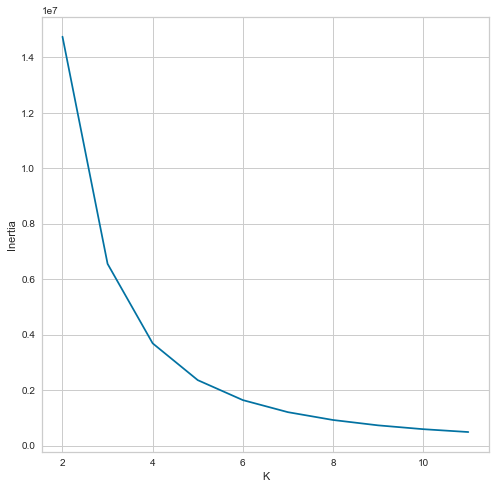

In [8]:
inertias = []
sizes = range(2, 12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 8))

pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [9]:
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        silhouette_score(X, k2.labels_)
    )
    chs.append(
        calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        davies_bouldin_score(
            X, k2.labels_
        )
    )

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

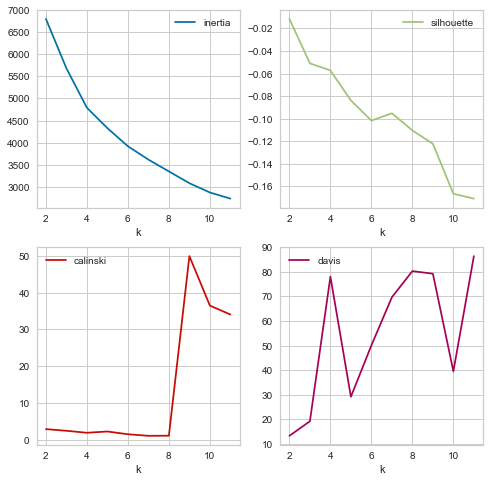

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

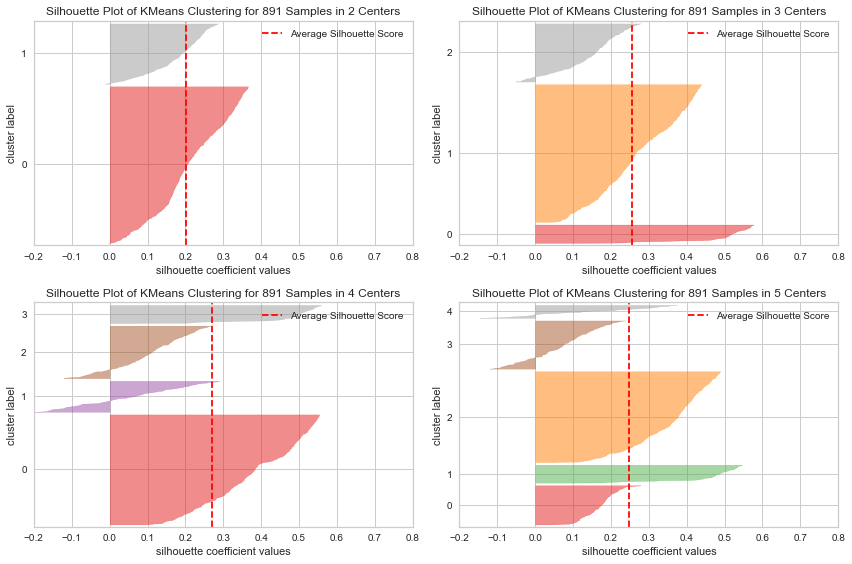

In [11]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)

for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_std)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
    
plt.tight_layout()

## Hierarchical Clustering

In [19]:
from scipy.cluster import hierarchy

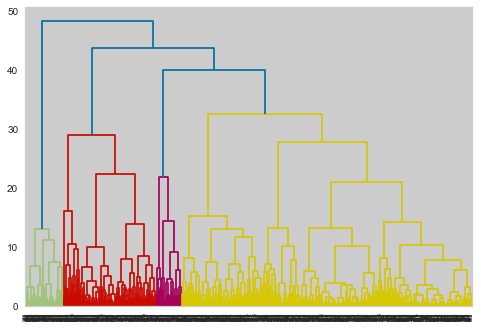

In [12]:
dend = hierarchy.dendrogram(hierarchy.linkage(X_std, method="ward"))

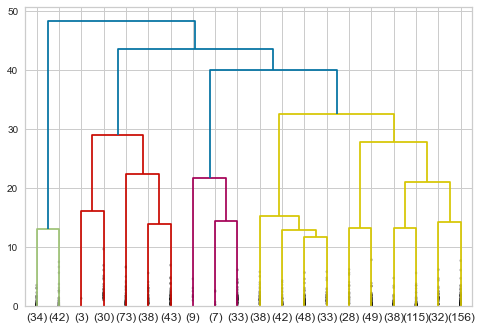

In [13]:
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

In [21]:
ag = AgglomerativeClustering(
    n_clusters=4,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X)

AgglomerativeClustering(n_clusters=4)

## Understanding Clusters

In [22]:
km = KMeans(n_clusters=2)
km.fit(X_std)
labels = km.predict(X_std)
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

cluster                      0             1
PassengerId mean    469.709677    436.855365
            var   60203.405250  68352.282787
Pclass      mean     -1.480388      0.514733
            var       0.168106      0.269344
Age         mean      0.805011     -0.259390
            var       1.007422      0.654248
SibSp       mean     -0.142368     -0.005790
            var       0.245825      1.041637
Parch       mean      0.350806      0.393468
            var       0.479675      0.715658
Fare        mean      0.868395     -0.325055
            var       2.236367      0.059403
Sex_male    mean      0.560484      0.681182
            var       0.247339      0.217511
Embarked_Q  mean      0.012097      0.115086
            var       0.011999      0.101999
Embarked_S  mean      0.637097      0.755832
            var       0.232141      0.184837
survived    mean      0.604839      0.298600
            var       0.239976      0.209764

<AxesSubplot:>

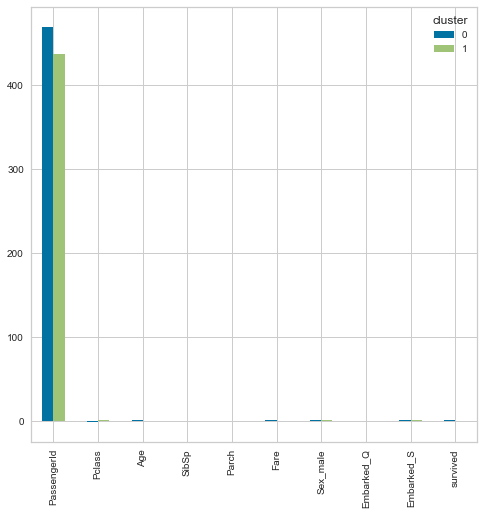

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

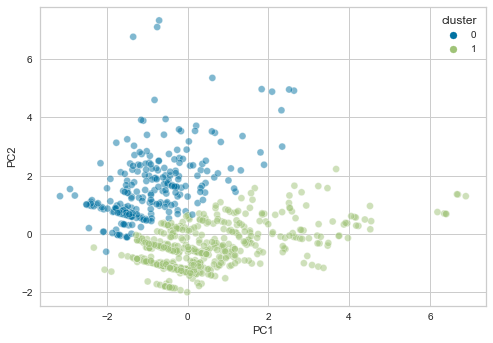

In [24]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

sns.scatterplot(
    "PC1",
    "PC2",
    data=X.assign(
        PC1=X_pca[:, 0],
        PC2=X_pca[:, 1],
        cluster=labels,
    ),
    hue="cluster",
    alpha=0.5
)

In [26]:
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .Age.describe()
    .T
)

cluster,0,1
count,248.000000,643.000000
mean,0.805011,-0.259390
std,1.003704,0.808856
min,-2.028699,-2.529351
25%,0.162320,-0.638917
50%,0.793161,-0.129039
75%,1.546275,0.089481
max,3.731468,3.294429


In [31]:
dt = DecisionTreeClassifier()
dt.fit(X, labels)

for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

Pclass         0.897
Age            0.082
PassengerId     0.015
SibSp          0.003
Parch          0.002
Fare           0.001
Sex_male       0.000
Embarked_Q     0.000
Embarked_S     0.000


In [32]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dot_data='tree.dot'

export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["0", "1"],
    max_depth=2,
    filled=True,
)

graph, = pydot.graph_from_dot_file(dot_data)
graph.write_png('tree.png')